1. Generate data and convert it to a pandas DataFrame

In [2]:
# Imports
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=0.2, random_state=139)

2. Basic Data Visualization


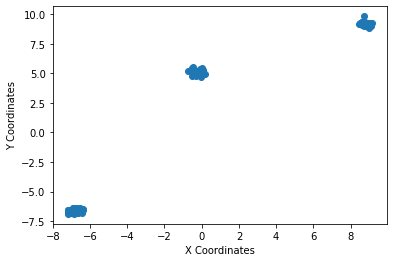

In [3]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

3. Using scikit-learn to perform K-Means clustering

In [4]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans

# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=139).fit(X)

4. Visualize and evaluate the results


In [5]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[-6.80263936, -6.64502783],
       [ 8.76474572,  9.20139964],
       [-0.21159603,  5.09602472]])

In [6]:
# Get the cluster labels
kmeans.labels_

array([1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 2, 2, 2, 1,
       2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 1, 0], dtype=int32)

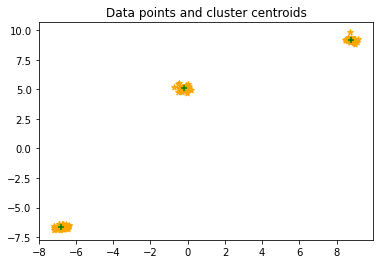

In [7]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1], c='orange', marker='*')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='green', marker='+')
plt.title('Data points and cluster centroids')
plt.show()

In [8]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.969398380178352


5. Determining the value of K using silhouette_score


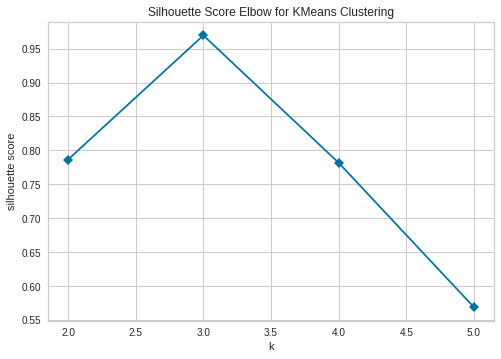

In [10]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=139)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)

# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()